<a href="https://colab.research.google.com/github/ArshaHaridas/crop-recommendation/blob/main/crop_recommend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import metrics 
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')


In [63]:
data = pd.read_csv("crop dataset2.csv")
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [64]:
crop_names = data['label'].unique()
print(crop_names)

# how many types of crops are there in the dataset
print(data['label'].unique().shape)

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
(22,)


In [65]:
data['label'].value_counts()

rice           400
maize          400
jute           400
cotton         400
coconut        400
papaya         400
orange         400
apple          400
muskmelon      400
watermelon     400
grapes         400
mango          400
banana         400
pomegranate    400
lentil         400
blackgram      400
mungbean       400
mothbeans      400
pigeonpeas     400
kidneybeans    400
chickpea       400
coffee         400
Name: label, dtype: int64

In [66]:
data.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [67]:
data.rename(columns={'N':'nitrogen','P':'phosphorus','K':'potassium','label':'crop'}, inplace=True)
data.head()

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [68]:
features = ['nitrogen','phosphorus','potassium','temperature','humidity','ph','rainfall']
target = ['crop']
# let's split the data up into features and labels
X = data[features]
y = data[target]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.33,random_state=10)

In [69]:
for ii, col in enumerate(features):
  print('{} (min,max): \t \t {:.2f} {:.2f}'.format(col,data[col].min(),data[col].max()))

nitrogen (min,max): 	 	 0.00 140.00
phosphorus (min,max): 	 	 5.00 145.00
potassium (min,max): 	 	 5.00 205.00
temperature (min,max): 	 	 8.83 43.68
humidity (min,max): 	 	 14.26 99.98
ph (min,max): 	 	 3.50 9.94
rainfall (min,max): 	 	 20.21 298.56


In [70]:
# scale inputs. It's important that we apply the scaling after splitting data into training and test
# Otherwise, we would introduce a bias in the training, as the scaling would depend on the test data which 
# in practice is not available during training
mmscaler = MinMaxScaler() 
X_train = mmscaler.fit_transform(X_train)
X_test = mmscaler.transform(X_test)
# convert labels to numerical values 
y_train = LabelEncoder().fit_transform(np.asarray(y_train).ravel())
y_test = LabelEncoder().fit_transform(np.asarray(y_test).ravel())
for ii, col in enumerate(features):
  print('{} (min,max): \t \t {:.2f} {:.2f}'.format(col,X_train[:,ii].min(),X_train[:,ii].max()))


nitrogen (min,max): 	 	 0.00 1.00
phosphorus (min,max): 	 	 0.00 1.00
potassium (min,max): 	 	 0.00 1.00
temperature (min,max): 	 	 0.00 1.00
humidity (min,max): 	 	 0.00 1.00
ph (min,max): 	 	 0.00 1.00
rainfall (min,max): 	 	 0.00 1.00


In [71]:
model = RandomForestClassifier()
# fit the model to the training data 
model.fit(X_train,y_train)
# get predictions on the test data 
y_pred=model.predict(X_test)
# print training and test accuracy
print('Training Accuracy: {:.2f}%, Test Accuracy: {:.2f}%'.format(metrics.accuracy_score(y_train,model.predict(X_train))*100,metrics.accuracy_score(y_test,model.predict(X_test))*100))

Training Accuracy: 100.00%, Test Accuracy: 100.00%


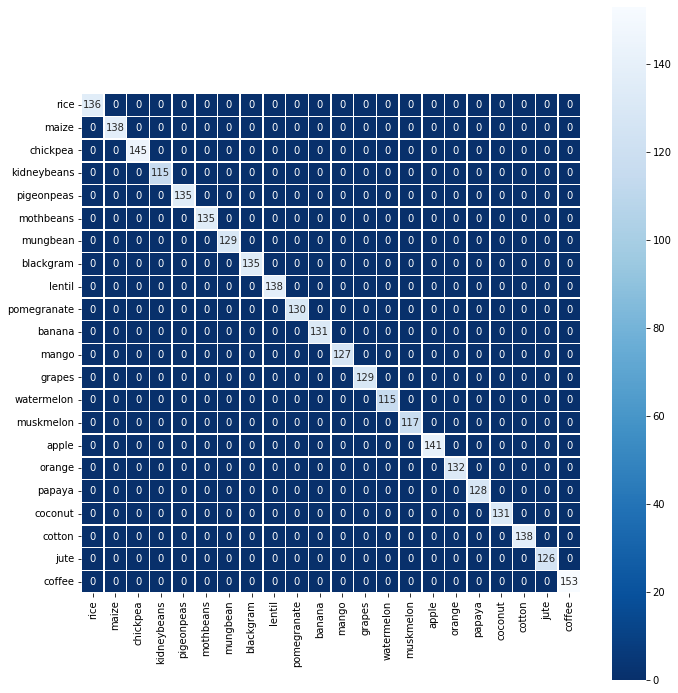

In [72]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
metrics.accuracy_score(y_test,y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_pred,y_test),square=True,cmap='Blues_r',annot=True,fmt=".0f",linewidths=.5)
ax = plt.gca()
_ = ax.set_xticklabels(crop_names,rotation='vertical')
_ = ax.set_yticklabels(crop_names,rotation='horizontal')
plt.tight_layout()

In [73]:
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00       138
           2       1.00      1.00      1.00       145
           3       1.00      1.00      1.00       115
           4       1.00      1.00      1.00       135
           5       1.00      1.00      1.00       135
           6       1.00      1.00      1.00       129
           7       1.00      1.00      1.00       135
           8       1.00      1.00      1.00       138
           9       1.00      1.00      1.00       130
          10       1.00      1.00      1.00       131
          11       1.00      1.00      1.00       127
          12       1.00      1.00      1.00       129
          13       1.00      1.00      1.00       115
          14       1.00      1.00      1.00       117
          15       1.00      1.00      1.00       141
          16       1.00      1.00      1.00       132
          17       1.00    

Training Accuracy: 91.47%, Test Accuracy: 90.87%
there are 100 trees in the forest


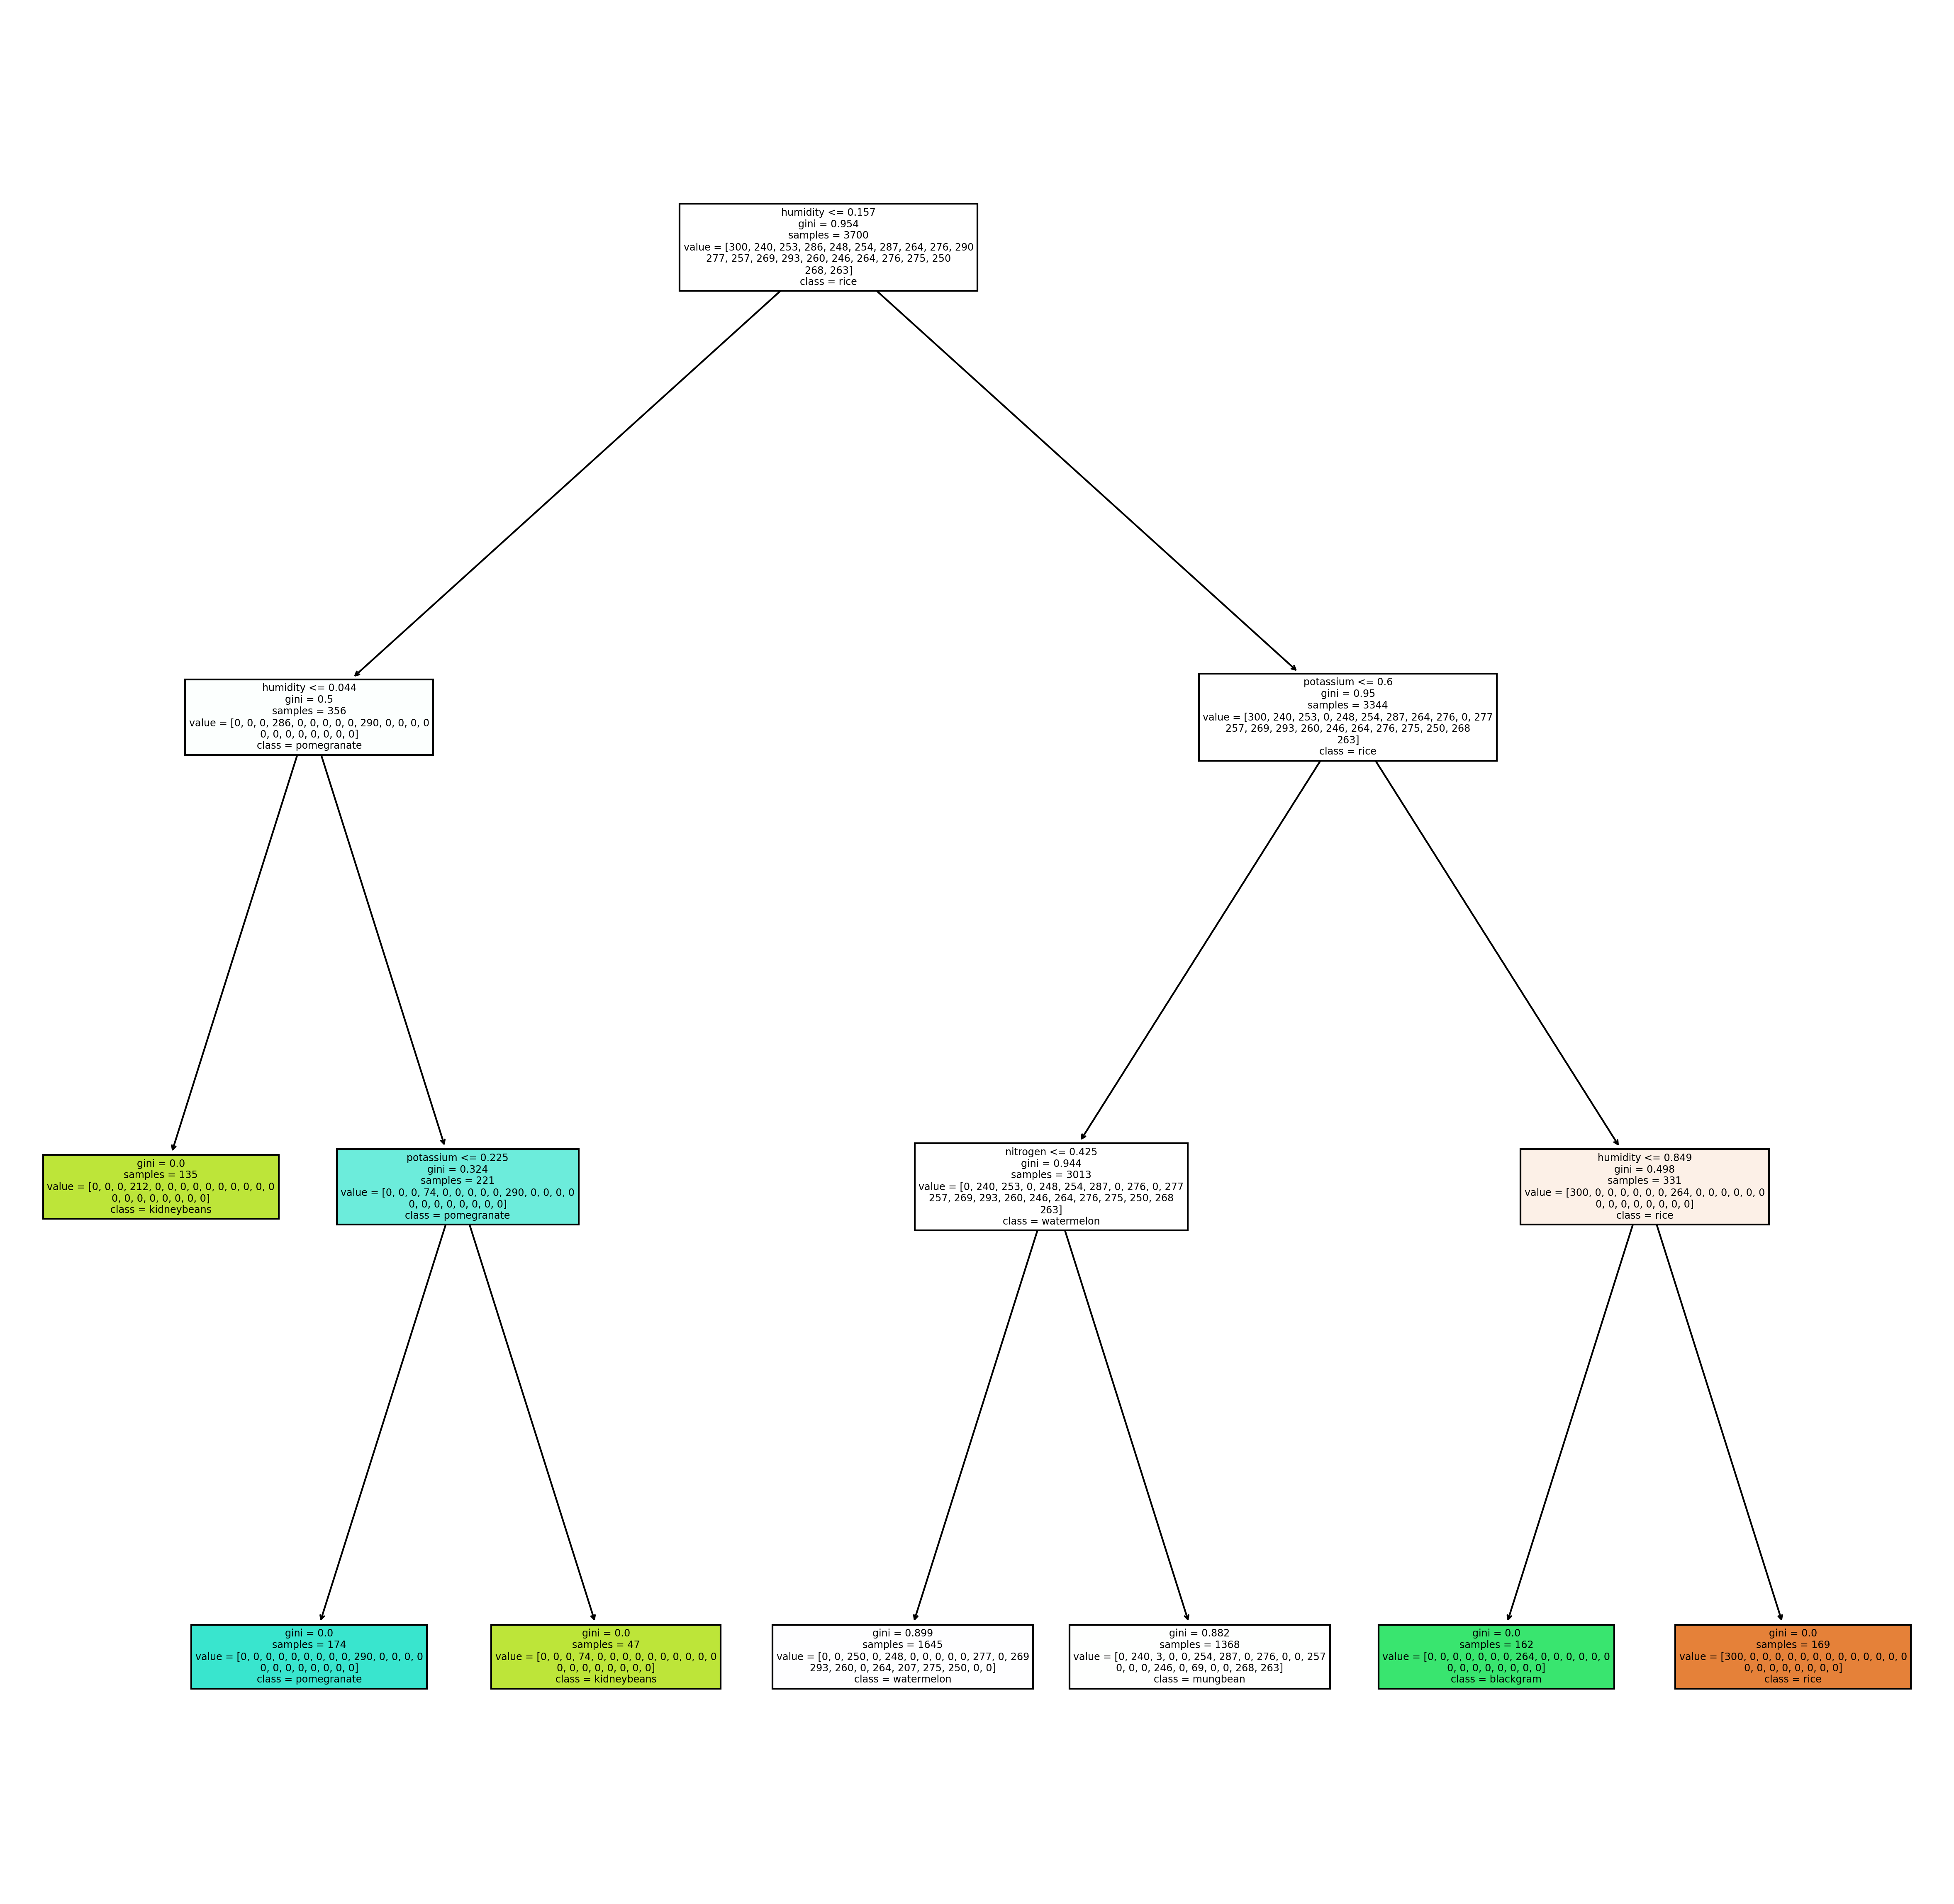

In [77]:



from sklearn import tree

# fit a smaller forest with a maximum depth of 3 (this is how many consecutive 
# decision the algorithm can make). As a consequence, the accuracy will be lower
# but it'll be easier to visualise it
small_rf = RandomForestClassifier(max_depth=3)
# fit the forest to the training data 
small_rf.fit(X_train,y_train)
# get predictions on the test data 
y_pred=small_rf.predict(X_test)
# print training and test accuracy
print('Training Accuracy: {:.2f}%, Test Accuracy: {:.2f}%'.format(metrics.accuracy_score(y_train,small_rf.predict(X_train))*100,metrics.accuracy_score(y_test,small_rf.predict(X_test))*100))


# obtain list of decision trees
trees = small_rf.estimators_
# how many are there
print('there are {n} trees in the forest'.format(n=len(trees)))

# visualise the first tree 
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20),dpi=300)
tree.plot_tree(trees[0],
               feature_names = features, 
               class_names=crop_names,
               filled = True);

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, y_pred))
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average='macro')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       0.98      1.00      0.99       138
           2       0.92      0.86      0.89       145
           3       1.00      1.00      1.00       115
           4       1.00      0.96      0.98       135
           5       0.97      0.99      0.98       135
           6       0.96      1.00      0.98       129
           7       1.00      1.00      1.00       135
           8       0.00      0.00      0.00       138
           9       1.00      1.00      1.00       130
          10       0.81      0.73      0.76       131
          11       0.99      0.96      0.98       127
          12       1.00      0.97      0.98       129
          13       0.58      0.74      0.65       115
          14       0.94      1.00      0.97       117
          15       1.00      1.00      1.00       141
          16       0.96      1.00      0.98       132
          17       1.00    

0.8938562222134323

In [86]:
models = []
models.append(('LogisticRegression',LogisticRegression(max_iter=5000)))
models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
models.append(('XGBClassifier',XGBClassifier(use_label_encoder=False,eval_metric='mlogloss')))
models.append(('GradientBoostingClassifier',GradientBoostingClassifier()))
models.append(('RandomForestClassifier',RandomForestClassifier()))
models.append(('KNeighborsClassifier',KNeighborsClassifier()))
models.append(('GaussianNB',GaussianNB()))
models.append(('SVM',SVC()))

# same as above, but in cross-validation
nfolds = 5
print('{} fold cv'.format(nfolds))
X_cv = np.asarray(X)
y_cv = LabelEncoder().fit_transform(np.asarray(y).ravel())

for name,model in models:
    # apply transformation to each individual fold
    pipeline = Pipeline([('transformer', MinMaxScaler()), ('estimator', model)])    
    scores = cross_val_score(pipeline, X_cv,y_cv , cv=nfolds)
    print(name, np.round(scores.mean(),3))

5 fold cv
LogisticRegression 0.968
DecisionTreeClassifier 1.0
XGBClassifier 1.0
GradientBoostingClassifier 1.0
RandomForestClassifier 1.0
KNeighborsClassifier 1.0
GaussianNB 0.995
SVM 0.989
